In [1]:
# import the necessary packages
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import time

 
# load the image
image = cv2.imread('screen_color.png')
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

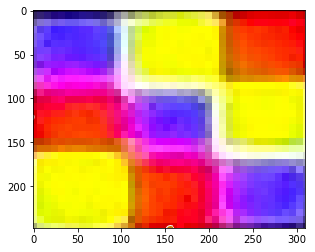

In [2]:
plt.imshow(image)
plt.show()

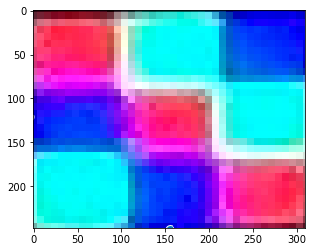

In [3]:
plt.imshow(imgRGB)
plt.show()

In [4]:
print(imgRGB[50,150])

[  0 255 249]


In [5]:
def cutting(img, indexX, indexY):
    colors = ''
    x = img.shape[0]
    y = img.shape[1]
    for i in range(0, indexX):
        #print("Index of i:", i)
        for j in range(0, indexY):
            #print("Index of j:", j)
            imTmp = img[(i)*x/indexX:(i+1)*x/indexX, (j)*y/indexY:(j+1)*y/indexY]
            #plt.imshow(imTmp)
            #plt.show()
            find_color(imTmp)

In [6]:
rgb_dictionary = {
    (255,0,0): 'red',
    (0,255,0):'green', 
    (0,255,249):'blue_cian',
    (0,0,255): 'blue'
}

In [7]:
def distance(c1, c2):
    (r1,g1,b1) = c1
    (r2,g2,b2) = c2
    return math.sqrt((r1 - r2)**2 + (g1 - g2) ** 2 + (b1 - b2) **2)

In [8]:
def witch_color(point):
    colors = list(rgb_dictionary.keys())
    closest_colors = sorted(colors, key=lambda color: distance(color, point))
    closest_color = closest_colors[0]
    code = rgb_dictionary[closest_color]
    #print(code)
    return code

In [9]:
def find_color(img):
    x = img.shape[0]
    y = img.shape[1]
    mid = img[x/2, y/2]
    witch_color(mid)   

In [10]:
start_time = time.time()
cutting(imgRGB, 3, 3)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0017430782318115234 seconds ---


/Users/veroniquegranoux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/veroniquegranoux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
start_time = time.time()
vidcap = cv2.VideoCapture('video_red.mov')
success,image = vidcap.read()
count = 0
success = True
while success:
    success,image = vidcap.read()
    cv2.imwrite("framed.jpg", image)     # save frame as JPEG file
    cutting(image, 3, 3)
    count += 1
print(count)
print("--- %s seconds ---" % (time.time() - start_time))

/Users/veroniquegranoux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/veroniquegranoux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


AttributeError: 'NoneType' object has no attribute 'shape'